Success analysis : finding cofounders 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import numpy as np
import string

In [2]:
character_metadata = pd.read_csv('Data/character.metadata.tsv', sep='\t', names = ['Wikipedia_movie_ID',
                                                                              'Freebase_movie_ID',
                                                                              'Movie_release_date',
                                                                              'Character_name',
                                                                              'Actor_date_of_birth',
                                                                              'Actor_gender',
                                                                              'Actor_height',
                                                                              'Actor_ethnicity',
                                                                              'Actor_name',
                                                                              'Actor_age_at_movie_release',
                                                                              'Freebase_character/actor_map_ID',
                                                                              'Freebase_character_ID',
                                                                              'Freebase_actor_ID'])

movie_metadata = pd.read_csv('Data/movie.metadata.tsv', sep='\t', names = ['Wikipedia_movie_ID',
                                                                              'Freebase_movie_ID',
                                                                              'Movie_name',
                                                                              'Movie_release_date',
                                                                              'Movie_box_office_revenue',
                                                                              'Movie_runtime',
                                                                              'Movie_languages',
                                                                              'Movie_countries',
                                                                              'Movie_genres'])

plot_summaries = pd.read_csv('Data/plot_summaries.txt', sep='\t', names = ['Wikipedia_movie_ID',
                                                                              'summary'])

movies = pd.read_csv('Data/movies_metadata_english_only.csv')

In [3]:
movies = pd.read_csv('Data/movies_metadata_english_only.csv')
print('Size of the dataset : ', movies.shape)
movies.dropna(subset=['Movie_box_office_revenue'], inplace=True)
print('Size of the dataset : ', movies.shape)
movies.head()

Size of the dataset :  (25945, 10)
Size of the dataset :  (5821, 10)


,Unnamed: 0,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres
0,0,975900,/m/03vyhn,Ghosts of Mars,2001,14010832.0,98.0,['English Language'],['United States of America'],"['Thriller', 'Science Fiction', 'Horror', 'Adv..."
4,7,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938,3600000.0,106.0,['English Language'],['United States of America'],"['Musical', 'Comedy', 'Black-and-white']"
8,13,171005,/m/016ywb,Henry V,1989,10161099.0,137.0,['English Language'],['United Kingdom'],"['Costume drama', 'War film', 'Epic', 'Period ..."
9,17,77856,/m/0kcn7,Mary Poppins,1964,102272727.0,139.0,['English Language'],['United States of America'],"[""Children's/Family"", 'Musical', 'Fantasy', 'C..."
11,21,612710,/m/02wjqm,New Rose Hotel,1999,21521.0,92.0,['English Language'],['United States of America'],"['Thriller', 'Science Fiction', 'Future noir',..."


In [4]:
# Load the dataframe with Consumer Price indexes
cpi = pd.read_csv('Data/CPI.csv', sep=';')
cpi['Annual'] = cpi['Annual'].str.replace(',', '.')
cpi['Annual'] = pd.to_numeric(cpi['Annual'], errors='coerce')

cpi_value_2012 = cpi.loc[cpi['Year'] == 2012, 'Annual'].values[0] # take 2012 as the reference year for the cpi beacause it is the leatest movie year of release 

def adjust_inflation_box_office(row):
    year = row['Movie_release_date']
    consumer_price_index = cpi['Annual'][cpi['Year'] == year].values[0]
    revenue_adjusted = row['Movie_box_office_revenue'] * (cpi_value_2012 / consumer_price_index)
    return revenue_adjusted

# Adjust the box office with the inflation
movies['Box_office_adjusted'] = movies.apply(adjust_inflation_box_office, axis=1)
movies.head()

,Unnamed: 0,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres,Box_office_adjusted
0,0,975900,/m/03vyhn,Ghosts of Mars,2001,14010832.0,98.0,['English Language'],['United States of America'],"['Thriller', 'Science Fiction', 'Horror', 'Adv...",1.816424e+07
4,7,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938,3600000.0,106.0,['English Language'],['United States of America'],"['Musical', 'Comedy', 'Black-and-white']",5.862128e+07
8,13,171005,/m/016ywb,Henry V,1989,10161099.0,137.0,['English Language'],['United Kingdom'],"['Costume drama', 'War film', 'Epic', 'Period ...",1.881442e+07
9,17,77856,/m/0kcn7,Mary Poppins,1964,102272727.0,139.0,['English Language'],['United States of America'],"[""Children's/Family"", 'Musical', 'Fantasy', 'C...",7.574780e+08
11,21,612710,/m/02wjqm,New Rose Hotel,1999,21521.0,92.0,['English Language'],['United States of America'],"['Thriller', 'Science Fiction', 'Future noir',...",2.965919e+04


In [5]:
# Load IMDB ratings
ratings_imdb = pd.read_table('Data/ratings_imdb.tsv', sep="\t")
ratings_imdb.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,2005
1,tt0000002,5.8,269
2,tt0000003,6.5,1908
3,tt0000004,5.5,178
4,tt0000005,6.2,2688


In [6]:
# import the file with the movies titles ID from imdb
import gdown
import pandas as pd

link_drive = "https://drive.google.com/file/d/1ZkAQhufH1q1a9aJDgs_AzR0hoo2p-LWQ/view?usp=share_link"
id_fichier = link_drive.split("/")[-2]
link_direct = f"https://drive.google.com/uc?id={id_fichier}"
name_file_local = "titles_imdb.tsv"
gdown.download(link_direct, name_file_local, quiet=False)
movie_imdb = pd.read_csv(name_file_local, sep='\t')

unuseful = ['titleType', 'isAdult', 'endYear', 'genres']
movie_imdb.drop(unuseful, axis =1, inplace=True)
movie_imdb.head()


Downloading...
From (uriginal): https://drive.google.com/uc?id=1ZkAQhufH1q1a9aJDgs_AzR0hoo2p-LWQ
From (redirected): https://drive.google.com/uc?id=1ZkAQhufH1q1a9aJDgs_AzR0hoo2p-LWQ&confirm=t&uuid=cb36c72a-c6d7-415f-90b3-00b710a15c80
To: /Users/blanchekerorgant/Documents/GitHub/2023/2023/ada-2023-project-randada/Projet/titles_imdb.tsv
100%|██████████| 884M/884M [02:11<00:00, 6.74MB/s] 
/var/folders/tn/v_tw25wx0cxgctjg5n0dqd0w0000gn/T/ipykernel_4101/1716720349.py:10: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  movie_imdb = pd.read_csv(name_file_local, sep='\t')


,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes
0,tt0000001,Carmencita,Carmencita,1894,1
1,tt0000002,Le clown et ses chiens,Le clown et ses chiens,1892,5
2,tt0000003,Pauvre Pierrot,Pauvre Pierrot,1892,4
3,tt0000004,Un bon bock,Un bon bock,1892,12
4,tt0000005,Blacksmith Scene,Blacksmith Scene,1893,1


In [7]:
# Load budget info about imdb movies

budget= pd.read_csv('Data/imdb_budget.csv',sep=",")
budget['date_x']=budget['date_x'].str.strip()
budget['date_x'] = pd.to_datetime(budget['date_x'], format='%m/%d/%Y')
budget['ReleaseYear'] = budget['date_x'].dt.year
unuseful = ['overview', 'status', 'crew', 'orig_lang', 'country', 'score', 'genre', 'orig_title', 'date_x']
budget.drop(unuseful, axis =1, inplace=True)
print(budget.shape)
budget.sample(10)

(10178, 4)


,names,budget_x,revenue,ReleaseYear
4362,Scared Shrekless,98000000.0,393840228.6,2010
2494,One Flew Over the Cuckoo's Nest,4400000.0,163274115.0,1976
8693,Sleeping with Other People,6548225.8,3214116.0,2015
2634,Rape Zombie: Lust of the Dead 3,147000000.0,595373442.6,2013
6722,LEGO DC Comics Super Heroes: Justice League - ...,133400000.0,732081775.6,2016
3508,Wu Kong,95000000.0,968154371.2,2017
5168,Bring It On: Worldwide #Cheersmack,72400000.0,471064868.8,2017
5937,After We Leave,77400000.0,745706751.2,2020
7163,El Dorado,4653000.0,6000000.0,1967
2247,LEGO Star Wars Terrifying Tales,129200000.0,375372218.6,2021


In [8]:
budget = budget[(budget['ReleaseYear'] >= 1913) & (budget['ReleaseYear'] < 2013)]
budget['ReleaseYear'] = budget['ReleaseYear'].astype('int64')


def adjust_inflation_budget(row):
    year = row['ReleaseYear']
    consumer_price_index = cpi['Annual'][cpi['Year'] == year].values[0]
    revenue_adjusted = row['budget_x'] * (cpi_value_2012 / consumer_price_index)
    return revenue_adjusted

budget['budget_adjusted'] = budget.apply(adjust_inflation_budget, axis=1)
budget.head()


,names,budget_x,revenue,ReleaseYear,budget_adjusted
22,The Passion of the Christ,25000000.0,6.223136e+08,2004,3.038645e+07
58,A Bronx Tale,10000000.0,1.728790e+07,1994,1.549258e+07
61,The Forbidden Legend: Sex & Chopsticks 2,89600000.0,3.183760e+08,2009,9.590751e+07
68,Avatar,237000000.0,2.923706e+09,2009,2.536839e+08
87,Super Mario Bros.,42000000.0,2.084491e+07,1993,6.673495e+07


In [9]:
# Load Rotten tomatoes dataset

rotten_tomatoes = pd.read_table('Data/movies_rottentomatoes.csv', sep=",")
rotten_tomatoes.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


In [22]:
rotten_tomatoes['original_release_date']=rotten_tomatoes['original_release_date'].str.strip()
print(rotten_tomatoes['original_release_date'].dtype)
rotten_tomatoes['datoriginal_release_datee_x'] = pd.to_datetime(rotten_tomatoes['original_release_date'], format='%y-%m-%d')

object


ValueError: time data "['2010-02-12']" doesn't match format "%y-%m-%d", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [10]:
#load the dataset with the list of famous actors (top 100 from IMDB) 

famous_actors= pd.read_csv('Data/famous_actors.csv')
famous_actors.head()
unuseful = ['Description', 'Birth Date', 'Created', 'Modified', 'Known For', 'Position']
famous_actors.drop(unuseful, axis =1, inplace=True)
famous_actors.head()


,Const,Name
0,nm0000134,Robert De Niro
1,nm0000197,Jack Nicholson
2,nm0000008,Marlon Brando
3,nm0000243,Denzel Washington
4,nm0000031,Katharine Hepburn


In [11]:
#clean the movie dataset from imdb

movie_imdb['startYear'] = movie_imdb['startYear'].replace('\\N', np.nan)
movie_imdb['runtimeMinutes'] = movie_imdb['runtimeMinutes'].replace('\\N', np.nan)

movie_imdb.dropna(subset=['startYear'], inplace =True)
movie_imdb.dropna(subset=['runtimeMinutes'], inplace =True)

movie_imdb['startYear']=movie_imdb['startYear'].astype('int')
movie_imdb['runtimeMinutes']=movie_imdb['runtimeMinutes'].astype(int).astype('int')

In [12]:
# merging imdb movies dataset and CMU movies dataset on Movie title, release date and runtime 

merged_movies = movies.merge(movie_imdb,left_on=['Movie_name', 'Movie_release_date', 'Movie_runtime'],right_on=['primaryTitle', 'startYear', 'runtimeMinutes'], how="inner")
print('Size of the new dataset : ', merged_movies.shape)
merged_movies.head()

/var/folders/tn/v_tw25wx0cxgctjg5n0dqd0w0000gn/T/ipykernel_4101/1580238346.py:3: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_movies = movies.merge(movie_imdb,left_on=['Movie_name', 'Movie_release_date', 'Movie_runtime'],right_on=['primaryTitle', 'startYear', 'runtimeMinutes'], how="inner")


Size of the new dataset :  (2969, 16)


,Unnamed: 0,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres,Box_office_adjusted,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes
0,0,975900,/m/03vyhn,Ghosts of Mars,2001,14010832.0,98.0,['English Language'],['United States of America'],"['Thriller', 'Science Fiction', 'Horror', 'Adv...",1.816424e+07,tt0228333,Ghosts of Mars,Ghosts of Mars,2001,98
1,7,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938,3600000.0,106.0,['English Language'],['United States of America'],"['Musical', 'Comedy', 'Black-and-white']",5.862128e+07,tt0029852,Alexander's Ragtime Band,Alexander's Ragtime Band,1938,106
2,13,171005,/m/016ywb,Henry V,1989,10161099.0,137.0,['English Language'],['United Kingdom'],"['Costume drama', 'War film', 'Epic', 'Period ...",1.881442e+07,tt0097499,Henry V,Henry V,1989,137
3,17,77856,/m/0kcn7,Mary Poppins,1964,102272727.0,139.0,['English Language'],['United States of America'],"[""Children's/Family"", 'Musical', 'Fantasy', 'C...",7.574780e+08,tt0058331,Mary Poppins,Mary Poppins,1964,139
4,36,1364293,/m/04wy0v,They Knew What They Wanted,1940,932000.0,96.0,['English Language'],['United States of America'],"['Romance Film', 'Marriage Drama', 'Drama', 'B...",1.528480e+07,tt0033150,They Knew What They Wanted,They Knew What They Wanted,1940,96


In [13]:
#adding the ratings feature, merging on tconst

movies_with_ratings= merged_movies.merge(ratings_imdb, left_on='tconst', right_on='tconst', how='inner')
print('Size of the dataset with the ratings : ', movies_with_ratings.shape)
movies_with_ratings.head()

Size of the dataset with the ratings :  (2967, 18)


,Unnamed: 0,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres,Box_office_adjusted,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,averageRating,numVotes
0,0,975900,/m/03vyhn,Ghosts of Mars,2001,14010832.0,98.0,['English Language'],['United States of America'],"['Thriller', 'Science Fiction', 'Horror', 'Adv...",1.816424e+07,tt0228333,Ghosts of Mars,Ghosts of Mars,2001,98,4.9,56894
1,7,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938,3600000.0,106.0,['English Language'],['United States of America'],"['Musical', 'Comedy', 'Black-and-white']",5.862128e+07,tt0029852,Alexander's Ragtime Band,Alexander's Ragtime Band,1938,106,6.8,2268
2,13,171005,/m/016ywb,Henry V,1989,10161099.0,137.0,['English Language'],['United Kingdom'],"['Costume drama', 'War film', 'Epic', 'Period ...",1.881442e+07,tt0097499,Henry V,Henry V,1989,137,7.5,31193
3,17,77856,/m/0kcn7,Mary Poppins,1964,102272727.0,139.0,['English Language'],['United States of America'],"[""Children's/Family"", 'Musical', 'Fantasy', 'C...",7.574780e+08,tt0058331,Mary Poppins,Mary Poppins,1964,139,7.8,181710
4,36,1364293,/m/04wy0v,They Knew What They Wanted,1940,932000.0,96.0,['English Language'],['United States of America'],"['Romance Film', 'Marriage Drama', 'Drama', 'B...",1.528480e+07,tt0033150,They Knew What They Wanted,They Knew What They Wanted,1940,96,6.1,479


In [14]:
#merging with the budget dataset on Movie name and adding the profit column
movies_budget_ratings = movies_with_ratings.merge(budget, left_on=['Movie_name', 'Movie_release_date'], right_on=['names', 'ReleaseYear'], how='inner')
print('Size of the dataset with the budget : ', movies_budget_ratings.shape)

#movies['budget'] = movies['budget'].astype(float)
#movies['revenue'] = movies['revenue'].astype(float)
movies_budget_ratings['profit'] = movies_budget_ratings['Box_office_adjusted'] - movies_budget_ratings['budget_adjusted']


Size of the dataset with the budget :  (779, 23)


In [15]:
# Standardize the profit and the ratings

success_data= movies_budget_ratings.copy(deep= True)

success_data['Movie_box_office_revenue'].dropna(inplace = True)

success_data['profit']= ((success_data['profit']-success_data['profit'].mean())/ success_data['profit'].std())
success_data['averageRating']= (success_data['averageRating']-success_data['averageRating'].mean())/ success_data['averageRating'].std()
print('Size of the dataset with the budget and ratings : ', success_data.shape)

# create an indice for success, based on ratings and box office revenues
success_data["success"]= (success_data['averageRating'] + success_data['profit'])/2

success_data.sample(10)

# Ne garder que les films avec box office réduit largement le dataset...


Size of the dataset with the budget and ratings :  (779, 24)


,Unnamed: 0,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres,...,runtimeMinutes,averageRating,numVotes,names,budget_x,revenue,ReleaseYear,budget_adjusted,profit,success
768,80878,152058,/m/013szf,Beneath the Planet of the Apes,1970,18999718.0,95.0,['English Language'],['United States of America'],"['Science Fiction', 'Action', 'Doomsday film']",...,95,-0.367567,49831,Beneath the Planet of the Apes,3000000.0,17489009.0,1970,1.775258e+07,0.051741,-0.157913
658,70408,5102319,/m/0d2qw8,Vacancy,2007,35300645.0,85.0,['English Language'],['United States of America'],"['Thriller', 'Horror', 'Psychological thriller']",...,85,-0.155546,105855,Vacancy,19000000.0,35300645.0,2007,2.104390e+07,-0.264383,-0.209964
649,69305,666948,/m/0315w4,The Cell,2000,104155843.0,107.0,['English Language'],"['United States of America', 'Germany']","['Thriller', 'Science Fiction', 'Horror', 'Psy...",...,107,0.056475,107306,The Cell,35000000.0,104102747.0,2000,4.666667e+07,0.041547,0.049011
79,9697,187010,/m/019kyn,Pinocchio,1940,84254167.0,88.0,['English Language'],['United States of America'],"['Adventure', 'Animation', 'Fantasy', 'Drama',...",...,88,1.222592,156233,Pinocchio,45000000.0,31681811.0,1940,7.380000e+08,2.317074,1.769833
424,45980,1370478,/m/04xdbd,Lord of Illusions,1995,13249614.0,109.0,['English Language'],['United States of America'],"['Mystery', 'Detective fiction', 'Horror', 'De...",...,109,-0.367567,18896,Lord of Illusions,87600000.0,246215895.8,1995,1.319748e+08,-0.800992,-0.584279
228,23511,702506,/m/0341c5,White Palace,1990,17487531.0,103.0,['English Language'],['United States of America'],"['Romantic drama', 'Romance Film', 'Drama', 'E...",...,103,0.162486,8746,White Palace,14586840.6,17487531.0,1990,2.562463e+07,-0.317845,-0.077679
757,79973,173941,/m/017gl1,The Lord of the Rings: The Fellowship of the Ring,2001,871530324.0,178.0,['English Language'],"['United States of America', 'New Zealand']","['Fantasy Adventure', 'Adventure', 'Epic', 'Fa...",...,178,2.600729,1955676,The Lord of the Rings: The Fellowship of the Ring,93000000.0,891216824.0,2001,1.205692e+08,3.825199,3.212964
454,49251,5533243,/m/0dr89x,The Bridges of Madison County,1995,182016617.0,135.0,['English Language'],['United States of America'],"['Romantic drama', 'Period piece', 'Drama', 'R...",...,135,1.328602,86815,The Bridges of Madison County,22000000.0,175516617.0,1995,3.314436e+07,0.655715,0.992159
474,51111,1125221,/m/048f00,National Lampoon's Christmas Vacation,1989,71319546.0,97.0,['English Language'],['United States of America'],"['Christmas movie', 'Family Film', 'Comedy', '...",...,97,1.222592,206442,National Lampoon's Christmas Vacation,27000000.0,71319546.0,1989,4.999355e+07,-0.000308,0.611142
586,63104,5866831,/m/047gn4y,Prince of Persia: The Sands of Time,2010,335154643.0,116.0,['English Language'],['United States of America'],"['Action/Adventure', 'Swashbuckler films', 'Ro...",...,116,0.268497,299897,Prince of Persia: The Sands of Time,200000000.0,336365676.0,2010,2.105456e+08,0.248130,0.258313


In [16]:
# Do famous actors influence the rating ?

#merge movies and character metadata to have access to actors information per movie
movies_and_actors = success_data.merge(character_metadata, on='Wikipedia_movie_ID', how='inner')

#to be considered as famous, an actor has to be in the famous_actors dataset
movies_and_actors['IsFamousActor']=movies_and_actors['Actor_name'].isin(famous_actors['Name'])

print(movies_and_actors.columns)

grouped_movies_actors = movies_and_actors.groupby('Wikipedia_movie_ID').agg({
      'Freebase_movie_ID_x': 'first', 'Movie_name': 'first',
       'Movie_release_date_x': 'first', 'Movie_box_office_revenue': 'first', 'Movie_runtime': 'first',
       'Movie_languages': 'first', 'Movie_countries': 'first', 'Movie_genres': 'first',
       'averageRating': 'first', 'budget_x': 'first', 
       'profit': 'first', 'success': 'first', 
       'Freebase_actor_ID': 'first', 'IsFamousActor': 'first',
    'Actor_name': lambda x: ', '.join(x.dropna()),
    'Character_name': lambda x: ', '.join(x.dropna()),
    'Freebase_character_ID': lambda x: ', '.join(x.dropna())
}).reset_index()
print('Size of the dataset with the actors: ', grouped_movies_actors.shape)

grouped_movies_actors.head()


Index(['Unnamed: 0', 'Wikipedia_movie_ID', 'Freebase_movie_ID_x', 'Movie_name',
       'Movie_release_date_x', 'Movie_box_office_revenue', 'Movie_runtime',
       'Movie_languages', 'Movie_countries', 'Movie_genres',
       'Box_office_adjusted', 'tconst', 'primaryTitle', 'originalTitle',
       'startYear', 'runtimeMinutes', 'averageRating', 'numVotes', 'names',
       'budget_x', 'revenue', 'ReleaseYear', 'budget_adjusted', 'profit',
       'success', 'Freebase_movie_ID_y', 'Movie_release_date_y',
       'Character_name', 'Actor_date_of_birth', 'Actor_gender', 'Actor_height',
       'Actor_ethnicity', 'Actor_name', 'Actor_age_at_movie_release',
       'Freebase_character/actor_map_ID', 'Freebase_character_ID',
       'Freebase_actor_ID', 'IsFamousActor'],
      dtype='object')
Size of the dataset with the actors:  (748, 18)


,Wikipedia_movie_ID,Freebase_movie_ID_x,Movie_name,Movie_release_date_x,Movie_box_office_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres,averageRating,budget_x,profit,success,Freebase_actor_ID,IsFamousActor,Actor_name,Character_name,Freebase_character_ID
0,4231,/m/01cbx,Buffy the Vampire Slayer,1992,16624456.0,86.0,['English Language'],['United States of America'],"['Action', 'Horror', 'Comedy', 'Horror Comedy']",-0.685599,7000000.0,-0.273887,-0.479743,/m/0337zp,False,"Kristy Swanson, Donald Sutherland, Paul Reuben...","Buffy Summers, Merrick, Amilyn, Lothos, Pike, ...","/m/0b41h, /m/0h5s5mz, /m/0h5s5p6, /m/0h2n0pr, ..."
1,4728,/m/01hq1,Batman Returns,1992,266822354.0,126.0,['English Language'],"['United States of America', 'United Kingdom']","['Crime Fiction', 'Thriller', 'Superhero movie...",0.798549,80000000.0,0.922472,0.860511,/m/0c4f8m,False,"Cristi Conaway, Michael Gough, Pat Hingle, Jan...","Ice Princess, Alfred Pennyworth, James Gordon,...","/m/0h5rr59, /m/02r129, /m/031v20, /m/0h5rr4q, ..."
2,9835,/m/02p5d,Escape from New York,1981,50000000.0,99.0,['English Language'],"['United States of America', 'United Kingdom']","['Thriller', 'Crime Fiction', 'Science Fiction...",0.798549,6000000.0,0.119643,0.459096,/m/09r5rb,False,"Frank Doubleday, Kurt Russell, Lee Van Cleef, ...","Romero, Snake Plissken, Hauk, Cabbie, Presiden...","/m/0h5twsj, /m/0345b_, /m/0h2y3nn, /m/0h5twr6,..."
3,9979,/m/02qcr,Eyes Wide Shut,1999,162091208.0,159.0,['English Language'],"['United States of America', 'United Kingdom']","['Thriller', 'Erotic Drama', 'Erotica', 'Myste...",1.222592,65000000.0,0.213166,0.717879,/m/0gbzrrl,False,"Mariana Hewett, Tom Cruise, Nicole Kidman, Mad...","Rosa, Bill Harford, Alice Hartford, Helena Har...","/m/0h5pb_4, /m/04jt3h_, /m/04dsqgh, /m/0g9f7s0..."
4,10487,/m/02vhv,Evil Dead II,1987,10900000.0,84.0,['English Language'],['United States of America'],"['Horror', 'Stop motion', 'Cult', 'Comedy', 'S...",1.434613,3500000.0,-0.277163,0.578725,/m/0gby7_x,False,"Richard Domeier, Bruce Campbell, Ted Raimi, Da...","Ed Getley, Ash Williams, Possessed Henrietta, ...","/m/0h608bf, /m/06_krl, /m/0h608c0, /m/0h608b6,..."


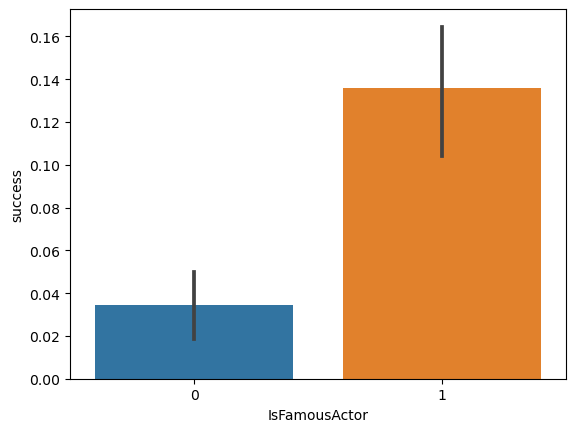

In [17]:
movies_and_actors['IsFamousActor'] = movies_and_actors['IsFamousActor'].astype(int)
ax = sns.barplot(data=movies_and_actors, x=movies_and_actors['IsFamousActor'],y=movies_and_actors['success'])

#est-ce qu'on garde que les films avec un revenue pour l'analyse du succès ? ça réduit beaucoup le dataframe non ? et est-ce qu'on ajuste avec l'inflation ?